In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sb
import matplotlib.pyplot as plt

# Read CSV Files
### List of all CSV files

In [2]:
print('### All DataFrames ###')
for idx, file in enumerate(os.listdir('cleaned-dataframes')):
    print(idx, '-', file)

### All DataFrames ###
0 - customerData.csv
1 - leadData.csv
2 - orderData.csv
3 - productData.csv
4 - sellerData.csv


### Read to `DataFrames`

In [3]:
customerData = pd.read_csv('cleaned-dataframes/customerData.csv')
customerData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         99441 non-null  object
 1   customer_unique_id  99441 non-null  object
 2   customer_state      99441 non-null  object
dtypes: object(3)
memory usage: 2.3+ MB


In [4]:
productData = pd.read_csv('cleaned-dataframes/productData.csv')
productData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32328 non-null  object 
 2   product_name_length         32341 non-null  float64
 3   product_description_length  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
 9   product_volume              32949 non-null  float64
 10  product_density             32949 non-null  float64
 11  product_items_sold          32951 non-null  int64  
 12  product_rating              32951 non-null  float64
 13  product_polarity            329

In [5]:
sellerData = pd.read_csv('cleaned-dataframes/sellerData.csv')
sellerData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   seller_id          3095 non-null   object
 1   seller_state       3095 non-null   object
 2   seller_items_sold  3095 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 72.7+ KB


In [6]:
leadData = pd.read_csv('cleaned-dataframes/leadData.csv')
leadData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   seller_id               380 non-null    object 
 1   business_segment        380 non-null    object 
 2   lead_type               377 non-null    object 
 3   lead_behaviour_profile  289 non-null    object 
 4   business_type           377 non-null    object 
 5   days_to_first_sale      380 non-null    float64
 6   deal_days               380 non-null    float64
dtypes: float64(2), object(5)
memory usage: 20.9+ KB


In [7]:
orderData = pd.read_csv('cleaned-dataframes/orderData.csv')
orderData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118318 entries, 0 to 118317
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              118318 non-null  object 
 1   seller_id             118318 non-null  object 
 2   product_id            118318 non-null  object 
 3   customer_id           118318 non-null  object 
 4   review_id             118318 non-null  object 
 5   order_status          118318 non-null  object 
 6   price                 118318 non-null  float64
 7   payment_type          118315 non-null  object 
 8   payment_installments  118315 non-null  float64
 9   payment_time          118303 non-null  float64
 10  lead_time             115730 non-null  float64
 11  delivery_performance  115730 non-null  float64
 12  review_time           118318 non-null  int64  
 13  review_score          118318 non-null  int64  
 14  review_en             50668 non-null   object 
 15  

# Visualisation
## 0. seller_items_sold
uni-variate exploration of the response

In [8]:
sellerData["seller_items_sold"].describe()

count    3095.000000
mean       38.228756
std       125.394261
min         1.000000
25%         2.000000
50%         8.000000
75%        26.000000
max      2155.000000
Name: seller_items_sold, dtype: float64

<AxesSubplot:>

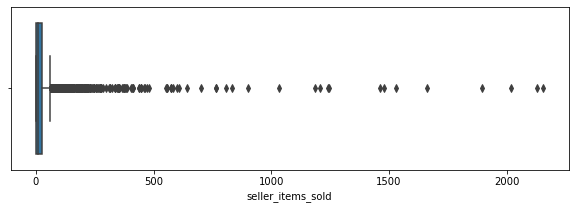

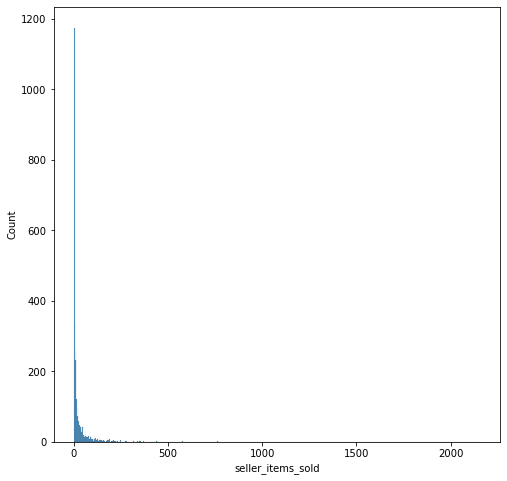

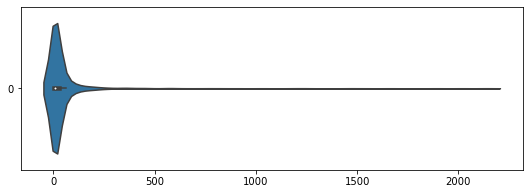

In [9]:
fig = plt.figure(figsize = (10,3))
sb.boxplot(x = "seller_items_sold", data = sellerData)

fig = plt.figure(figsize = (8,8))
sb.histplot(data=sellerData["seller_items_sold"])

fig = plt.figure(figsize = (9,3))
sb.violinplot(data=sellerData["seller_items_sold"], orient = 'h')

## 1. sellerData
seller_items_sold against variables in sellerData

<AxesSubplot:xlabel='seller_items_sold', ylabel='seller_state'>

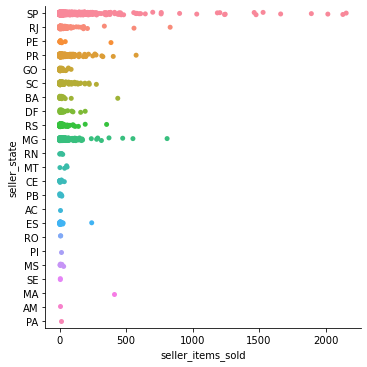

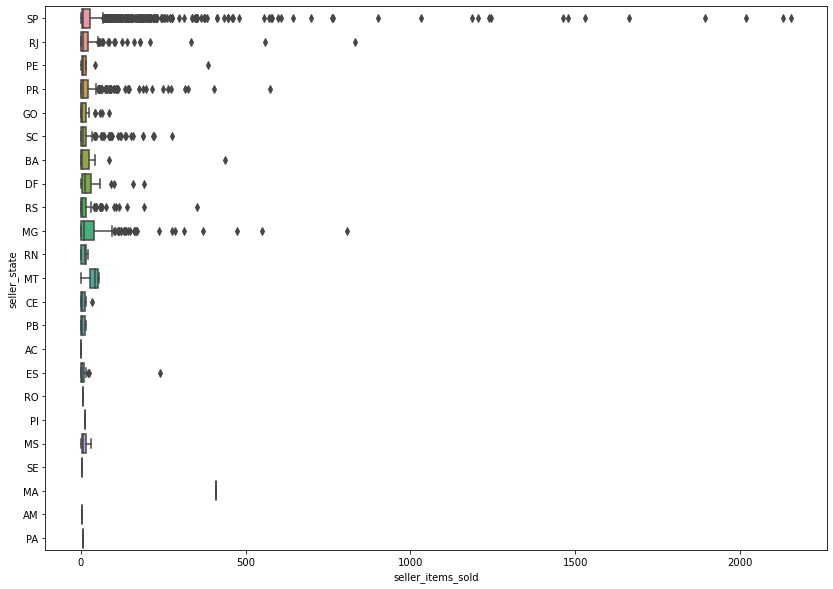

In [10]:
sb.catplot(data = sellerData, x="seller_items_sold", y="seller_state")

fig = plt.figure(figsize = (14,10))
sb.boxplot(x = "seller_items_sold", y= "seller_state", data = sellerData)

## 2. leadData
seller_items_sold against variables in leadData

In [11]:
# merging
sl = leadData.merge(sellerData[["seller_id", "seller_items_sold"]], on="seller_id")
sl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 380 entries, 0 to 379
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   seller_id               380 non-null    object 
 1   business_segment        380 non-null    object 
 2   lead_type               377 non-null    object 
 3   lead_behaviour_profile  289 non-null    object 
 4   business_type           377 non-null    object 
 5   days_to_first_sale      380 non-null    float64
 6   deal_days               380 non-null    float64
 7   seller_items_sold       380 non-null    int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 26.7+ KB


In [12]:
sl.describe()

,days_to_first_sale,deal_days,seller_items_sold
count,380.00000,380.000000,380.000000
mean,51.65000,28.055263,13.878947
std,36.73044,50.806941,38.766891
min,3.00000,-2.000000,1.000000
25%,22.00000,4.000000,2.000000
50%,44.00000,10.000000,5.000000
75%,72.00000,25.250000,13.000000
max,220.00000,369.000000,598.000000


<AxesSubplot:>

<Figure size 576x576 with 0 Axes>

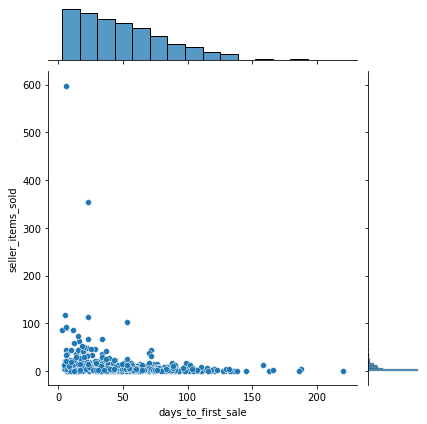

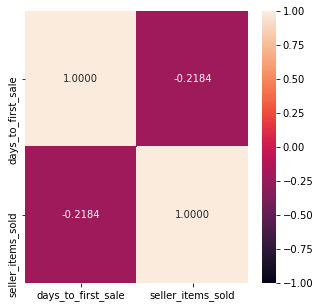

In [13]:
fig = plt.figure(figsize = (8,8))
sb.jointplot(data = sl, x="days_to_first_sale", y="seller_items_sold")

fig = plt.figure(figsize = (5,5))
sb.heatmap(sl[["days_to_first_sale", "seller_items_sold"]].corr(), vmin = -1, vmax = 1, annot = True, fmt=".4f")

<AxesSubplot:>

<Figure size 576x576 with 0 Axes>

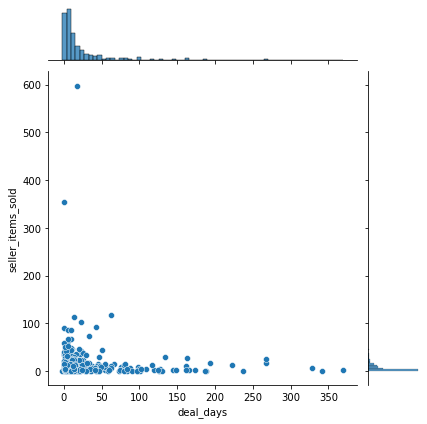

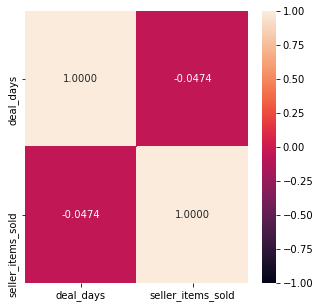

In [14]:
fig = plt.figure(figsize = (8,8))
sb.jointplot(data = sl, x="deal_days", y="seller_items_sold")

fig = plt.figure(figsize = (5,5))
sb.heatmap(sl[["deal_days", "seller_items_sold"]].corr(), vmin = -1, vmax = 1, annot = True, fmt=".4f")

<AxesSubplot:xlabel='seller_items_sold', ylabel='business_segment'>

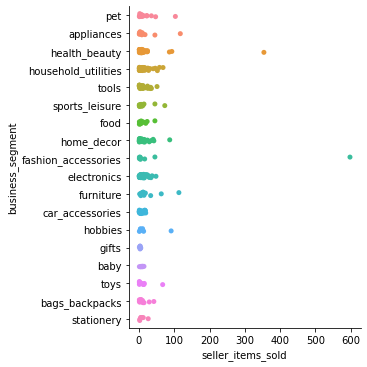

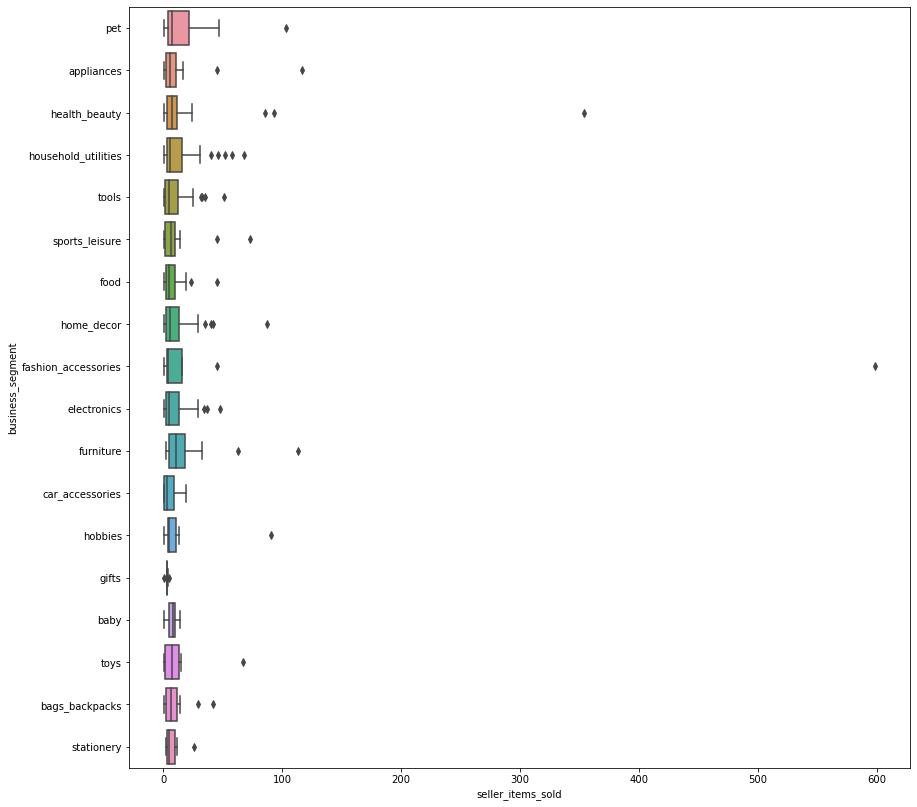

In [15]:
sb.catplot(data = sl, x="seller_items_sold", y="business_segment")

fig = plt.figure(figsize = (14,14))
sb.boxplot(x = "seller_items_sold", y= "business_segment", data = sl)

<AxesSubplot:xlabel='seller_items_sold', ylabel='lead_type'>

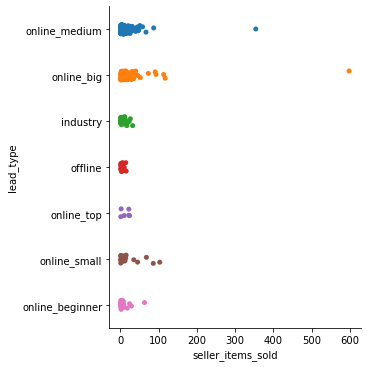

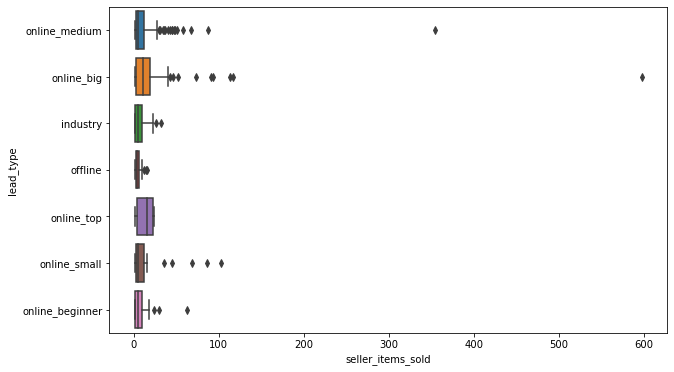

In [16]:
sb.catplot(data = sl, x="seller_items_sold", y="lead_type")

fig = plt.figure(figsize = (10,6))
sb.boxplot(x = "seller_items_sold", y= "lead_type", data = sl)

<AxesSubplot:xlabel='seller_items_sold', ylabel='lead_behaviour_profile'>

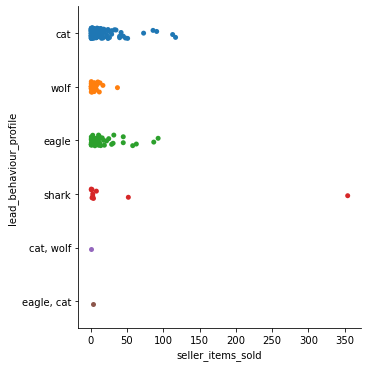

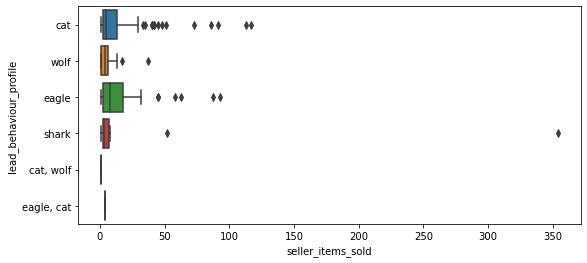

In [17]:
sb.catplot(data = sl, x="seller_items_sold", y="lead_behaviour_profile")

fig = plt.figure(figsize = (9,4))
sb.boxplot(x = "seller_items_sold", y= "lead_behaviour_profile", data = sl)

<AxesSubplot:xlabel='seller_items_sold', ylabel='business_type'>

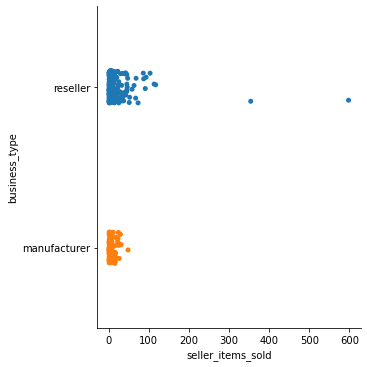

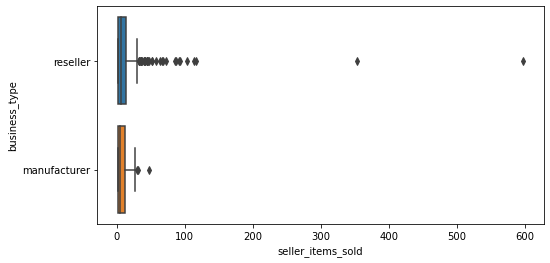

In [18]:
sb.catplot(data = sl, x="seller_items_sold", y="business_type")

fig = plt.figure(figsize = (8,4))
sb.boxplot(x = "seller_items_sold", y= "business_type", data = sl)

## 3. orderData
seller_items_sold against variables in orderData

In [19]:
# merging
so = orderData.merge(sellerData[["seller_id", "seller_items_sold"]], on="seller_id")
so.drop(columns=["review_score", "review_en", "polarity"], inplace=True) # we don't need to visualise against these columns
so.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118318 entries, 0 to 118317
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              118318 non-null  object 
 1   seller_id             118318 non-null  object 
 2   product_id            118318 non-null  object 
 3   customer_id           118318 non-null  object 
 4   review_id             118318 non-null  object 
 5   order_status          118318 non-null  object 
 6   price                 118318 non-null  float64
 7   payment_type          118315 non-null  object 
 8   payment_installments  118315 non-null  float64
 9   payment_time          118303 non-null  float64
 10  lead_time             115730 non-null  float64
 11  delivery_performance  115730 non-null  float64
 12  review_time           118318 non-null  int64  
 13  seller_items_sold     118318 non-null  int64  
dtypes: float64(5), int64(2), object(7)
memory usage: 13.

In [20]:
so.describe()

,price,payment_installments,payment_time,lead_time,delivery_performance,review_time,seller_items_sold
count,118318.000000,118315.000000,118303.000000,115730.000000,115730.000000,118318.000000,118318.000000
mean,120.649109,2.943498,0.271160,12.023019,11.048760,2.578374,449.401968
std,184.107686,2.778022,0.806929,9.454891,10.164088,9.723974,595.734304
min,0.850000,0.000000,0.000000,0.000000,-189.000000,0.000000,1.000000
25%,39.900000,1.000000,0.000000,6.000000,6.000000,1.000000,60.000000
50%,74.900000,2.000000,0.000000,10.000000,12.000000,1.000000,180.000000
75%,134.900000,4.000000,0.000000,15.000000,16.000000,3.000000,559.000000
max,6735.000000,24.000000,60.000000,209.000000,146.000000,518.000000,2155.000000


<AxesSubplot:>

<Figure size 576x576 with 0 Axes>

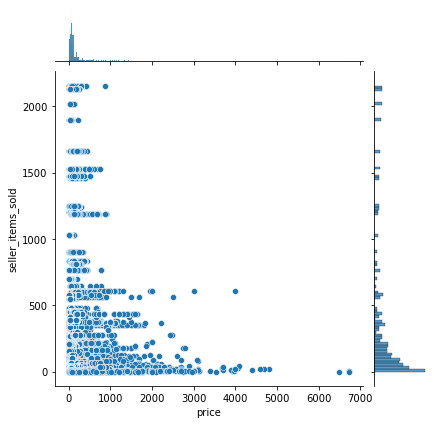

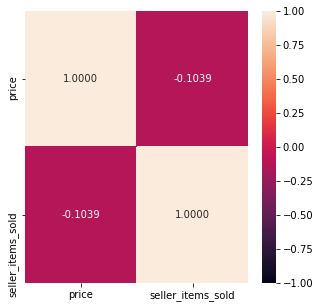

In [21]:
fig = plt.figure(figsize = (8,8))
sb.jointplot(data = so, x="price", y="seller_items_sold")

fig = plt.figure(figsize = (5,5))
sb.heatmap(so[["price", "seller_items_sold"]].corr(), vmin = -1, vmax = 1, annot = True, fmt=".4f")

<AxesSubplot:>

<Figure size 576x576 with 0 Axes>

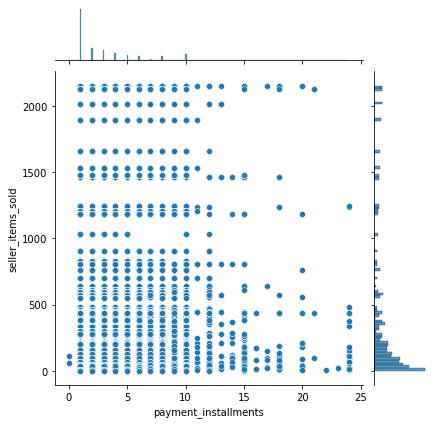

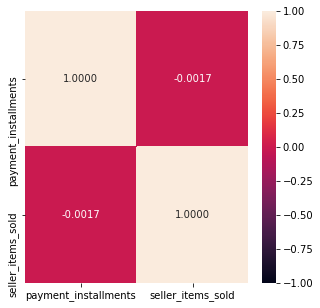

In [22]:
fig = plt.figure(figsize = (8,8))
sb.jointplot(data = so, x="payment_installments", y="seller_items_sold")

fig = plt.figure(figsize = (5,5))
sb.heatmap(so[["payment_installments", "seller_items_sold"]].corr(), vmin = -1, vmax = 1, annot = True, fmt=".4f")

<AxesSubplot:>

<Figure size 576x576 with 0 Axes>

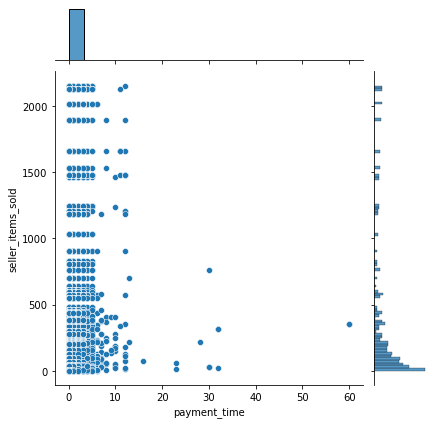

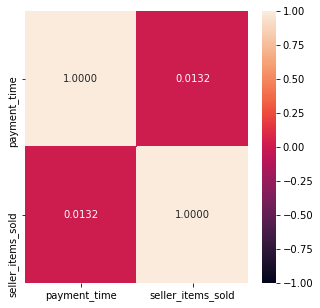

In [23]:
fig = plt.figure(figsize = (8,8))
sb.jointplot(data = so, x="payment_time", y="seller_items_sold")

fig = plt.figure(figsize = (5,5))
sb.heatmap(so[["payment_time", "seller_items_sold"]].corr(), vmin = -1, vmax = 1, annot = True, fmt=".4f")

<AxesSubplot:>

<Figure size 576x576 with 0 Axes>

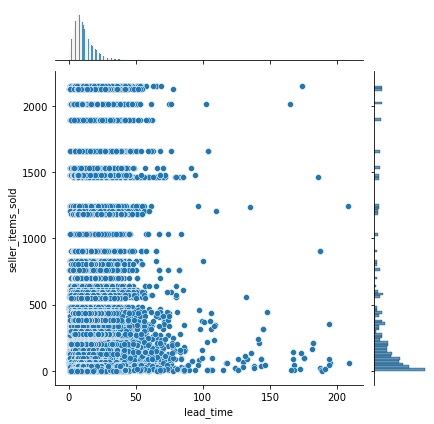

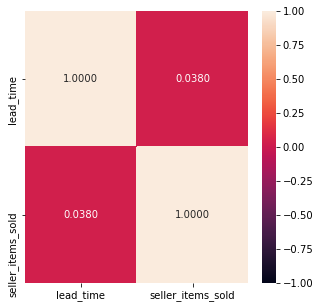

In [24]:
fig = plt.figure(figsize = (8,8))
sb.jointplot(data = so, x="lead_time", y="seller_items_sold")

fig = plt.figure(figsize = (5,5))
sb.heatmap(so[["lead_time", "seller_items_sold"]].corr(), vmin = -1, vmax = 1, annot = True, fmt=".4f")

<AxesSubplot:>

<Figure size 576x576 with 0 Axes>

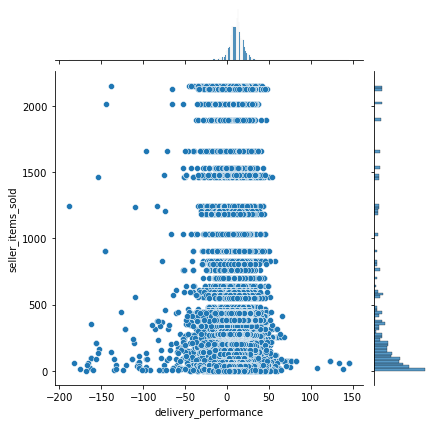

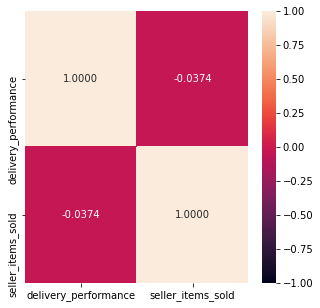

In [25]:
fig = plt.figure(figsize = (8,8))
sb.jointplot(data = so, x="delivery_performance", y="seller_items_sold")

fig = plt.figure(figsize = (5,5))
sb.heatmap(so[["delivery_performance", "seller_items_sold"]].corr(), vmin = -1, vmax = 1, annot = True, fmt=".4f")

<AxesSubplot:>

<Figure size 576x576 with 0 Axes>

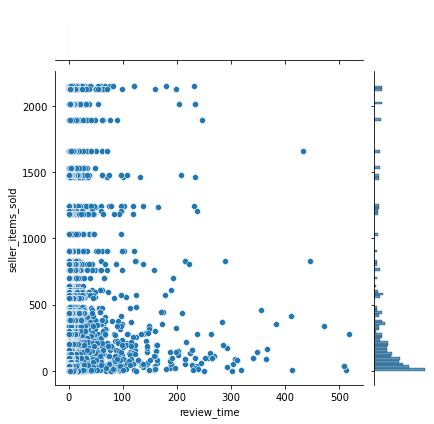

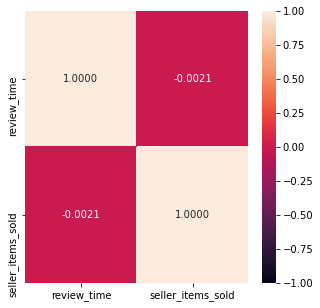

In [26]:
fig = plt.figure(figsize = (8,8))
sb.jointplot(data = so, x="review_time", y="seller_items_sold")

fig = plt.figure(figsize = (5,5))
sb.heatmap(so[["review_time", "seller_items_sold"]].corr(), vmin = -1, vmax = 1, annot = True, fmt=".4f")

<AxesSubplot:xlabel='seller_items_sold', ylabel='order_status'>

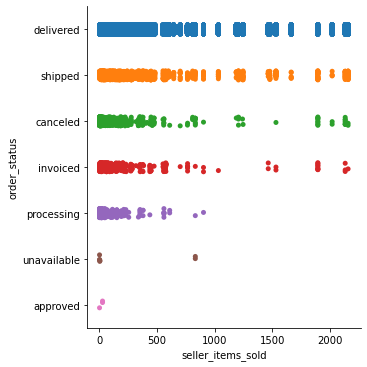

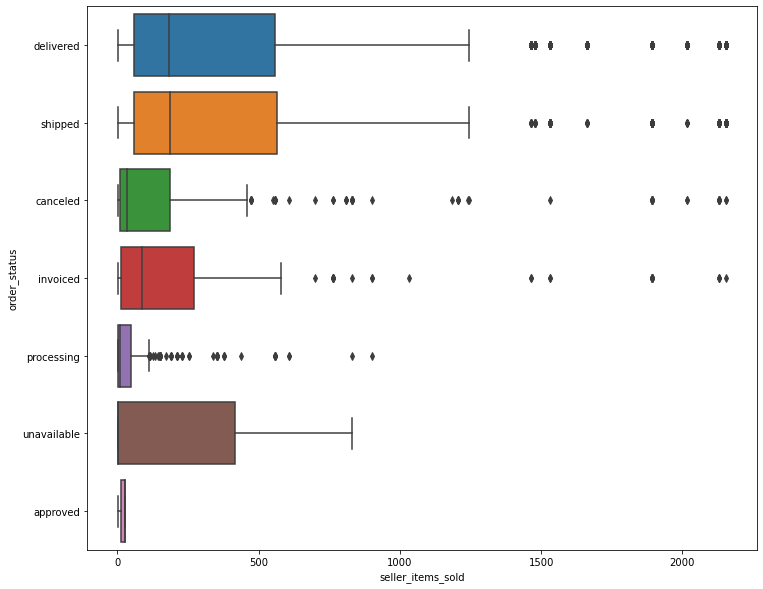

In [27]:
sb.catplot(data = so, x="seller_items_sold", y="order_status")

fig = plt.figure(figsize = (12,10))
sb.boxplot(x = "seller_items_sold", y= "order_status", data = so)

<AxesSubplot:xlabel='seller_items_sold', ylabel='payment_type'>

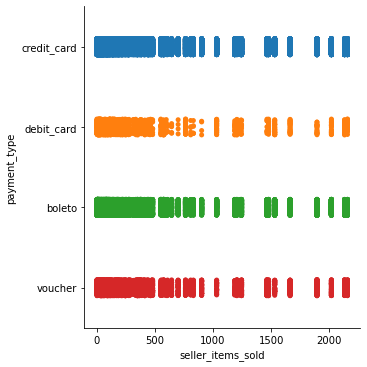

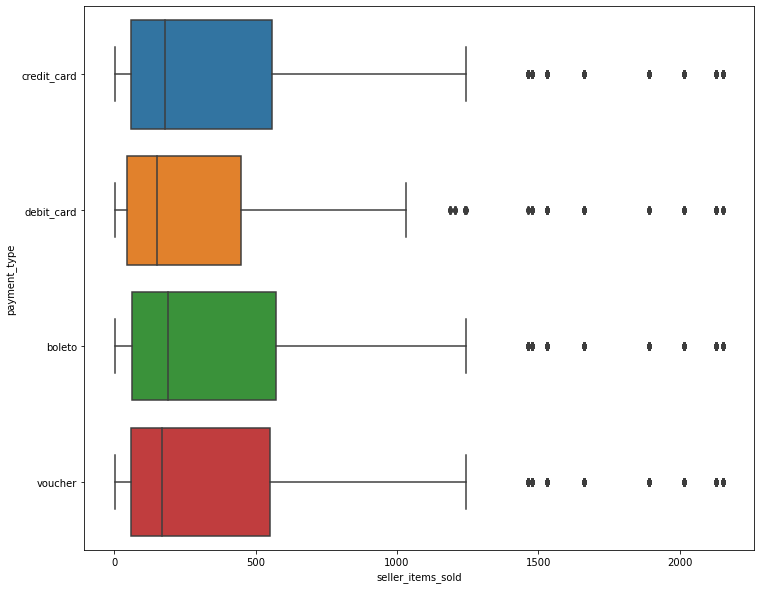

In [28]:
sb.catplot(data = so, x="seller_items_sold", y="payment_type")

fig = plt.figure(figsize = (12,10))
sb.boxplot(x = "seller_items_sold", y= "payment_type", data = so)

## 4. productData
seller_items_sold against variables in productData

In [47]:
# merging
sp = productData.merge(so[["product_id", "seller_id", "seller_items_sold"]], on="product_id")
sp.drop_duplicates(subset=["product_id"], inplace=True) # we don't need duplicate products
sp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32951 entries, 0 to 118317
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32328 non-null  object 
 2   product_name_length         32341 non-null  float64
 3   product_description_length  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
 9   product_volume              32949 non-null  float64
 10  product_density             32949 non-null  float64
 11  product_items_sold          32951 non-null  int64  
 12  product_rating              32951 non-null  float64
 13  product_polarity            32

In [30]:
sp.describe()

,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_volume,product_density,product_items_sold,product_rating,product_polarity,seller_items_sold
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000,32949.000000,32949.000000,32951.000000,32951.000000,32951.000000,32951.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728,16564.096695,0.203690,3.590726,4.038113,0.116749,248.841006
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047,27057.041650,1.009271,11.076677,1.218262,0.251282,415.516210
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,168.000000,0.000000,1.000000,1.000000,-1.000000,1.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000,2880.000000,0.066176,1.000000,3.571429,0.000000,26.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000,6840.000000,0.116550,1.000000,4.500000,0.000000,91.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000,18480.000000,0.195869,3.000000,5.000000,0.175000,261.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,296208.000000,85.227273,536.000000,5.000000,1.000000,2155.000000


<AxesSubplot:>

<Figure size 576x576 with 0 Axes>

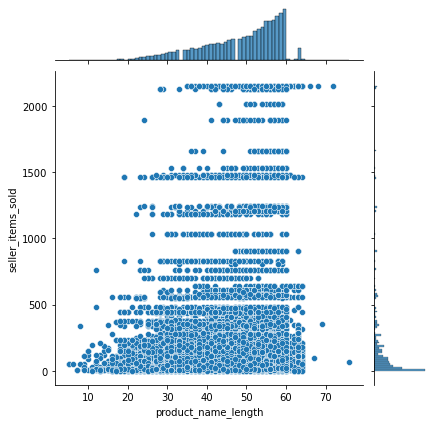

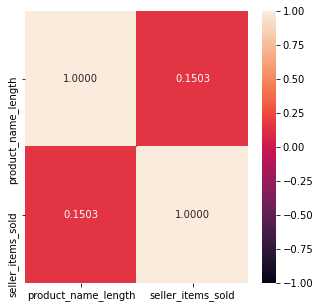

In [31]:
fig = plt.figure(figsize = (8,8))
sb.jointplot(data = sp, x="product_name_length", y="seller_items_sold")

fig = plt.figure(figsize = (5,5))
sb.heatmap(sp[["product_name_length", "seller_items_sold"]].corr(), vmin = -1, vmax = 1, annot = True, fmt=".4f")

<AxesSubplot:>

<Figure size 576x576 with 0 Axes>

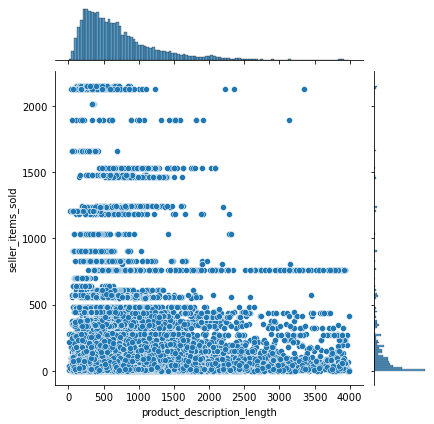

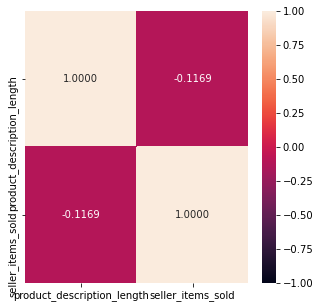

In [32]:
fig = plt.figure(figsize = (8,8))
sb.jointplot(data = sp, x="product_description_length", y="seller_items_sold")

fig = plt.figure(figsize = (5,5))
sb.heatmap(sp[["product_description_length", "seller_items_sold"]].corr(), vmin = -1, vmax = 1, annot = True, fmt=".4f")

<AxesSubplot:>

<Figure size 576x576 with 0 Axes>

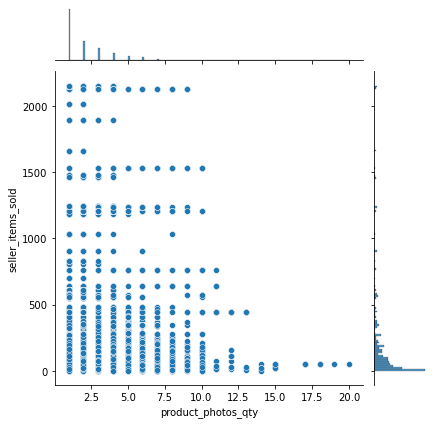

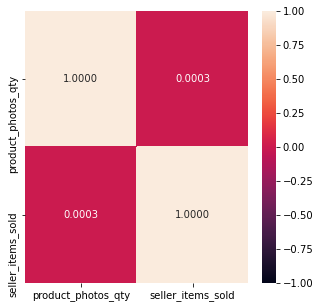

In [33]:
fig = plt.figure(figsize = (8,8))
sb.jointplot(data = sp, x="product_photos_qty", y="seller_items_sold")

fig = plt.figure(figsize = (5,5))
sb.heatmap(sp[["product_photos_qty", "seller_items_sold"]].corr(), vmin = -1, vmax = 1, annot = True, fmt=".4f")

<AxesSubplot:>

<Figure size 576x576 with 0 Axes>

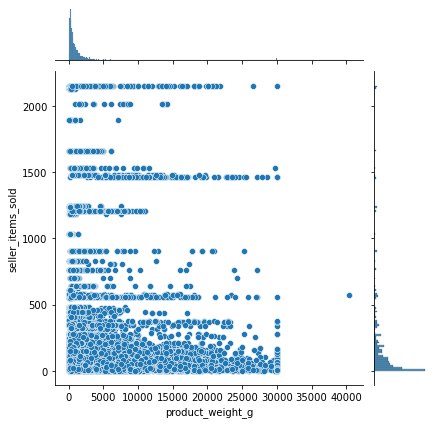

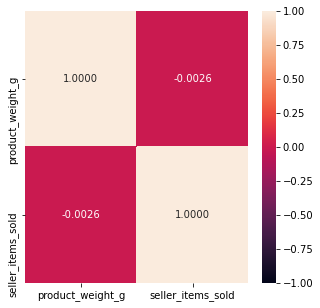

In [34]:
fig = plt.figure(figsize = (8,8))
sb.jointplot(data = sp, x="product_weight_g", y="seller_items_sold")

fig = plt.figure(figsize = (5,5))
sb.heatmap(sp[["product_weight_g", "seller_items_sold"]].corr(), vmin = -1, vmax = 1, annot = True, fmt=".4f")

<AxesSubplot:>

<Figure size 576x576 with 0 Axes>

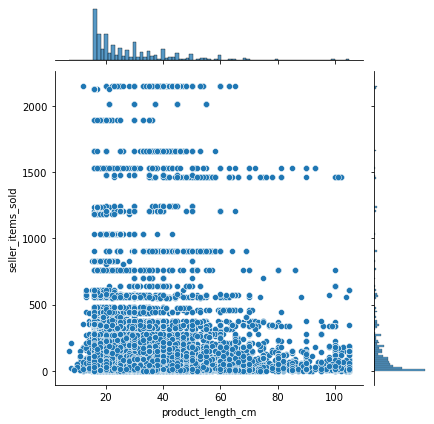

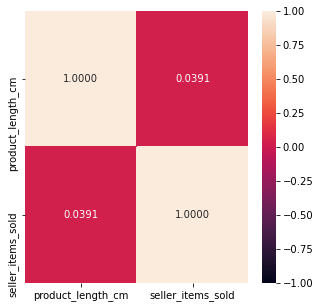

In [35]:
fig = plt.figure(figsize = (8,8))
sb.jointplot(data = sp, x="product_length_cm", y="seller_items_sold")

fig = plt.figure(figsize = (5,5))
sb.heatmap(sp[["product_length_cm", "seller_items_sold"]].corr(), vmin = -1, vmax = 1, annot = True, fmt=".4f")

<AxesSubplot:>

<Figure size 576x576 with 0 Axes>

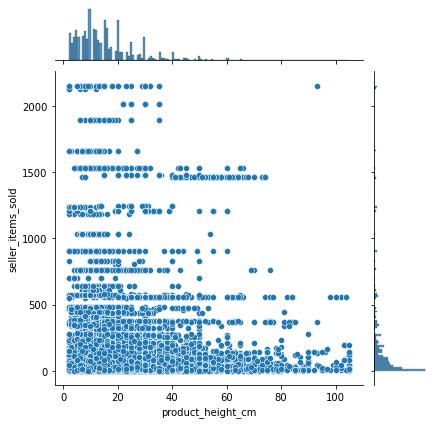

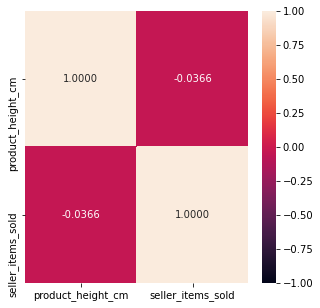

In [36]:
fig = plt.figure(figsize = (8,8))
sb.jointplot(data = sp, x="product_height_cm", y="seller_items_sold")

fig = plt.figure(figsize = (5,5))
sb.heatmap(sp[["product_height_cm", "seller_items_sold"]].corr(), vmin = -1, vmax = 1, annot = True, fmt=".4f")

<AxesSubplot:>

<Figure size 576x576 with 0 Axes>

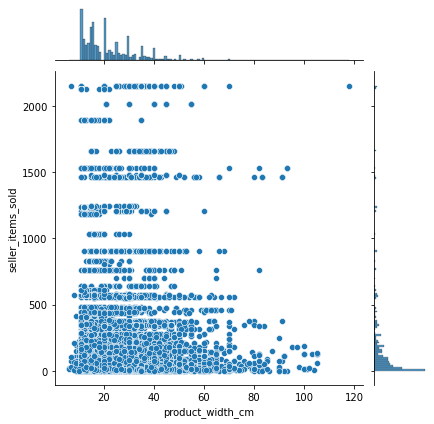

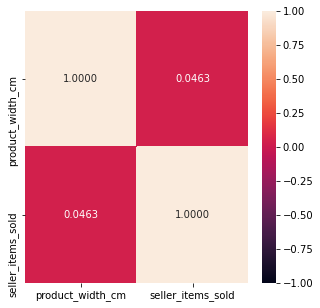

In [37]:
fig = plt.figure(figsize = (8,8))
sb.jointplot(data = sp, x="product_width_cm", y="seller_items_sold")

fig = plt.figure(figsize = (5,5))
sb.heatmap(sp[["product_width_cm", "seller_items_sold"]].corr(), vmin = -1, vmax = 1, annot = True, fmt=".4f")

<AxesSubplot:>

<Figure size 576x576 with 0 Axes>

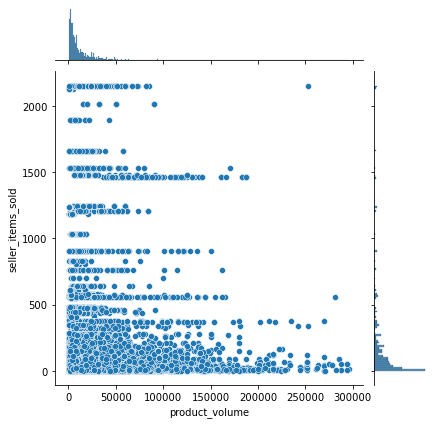

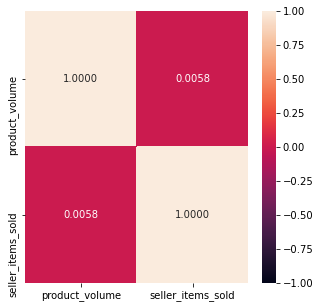

In [38]:
fig = plt.figure(figsize = (8,8))
sb.jointplot(data = sp, x="product_volume", y="seller_items_sold")

fig = plt.figure(figsize = (5,5))
sb.heatmap(sp[["product_volume", "seller_items_sold"]].corr(), vmin = -1, vmax = 1, annot = True, fmt=".4f")

<AxesSubplot:>

<Figure size 576x576 with 0 Axes>

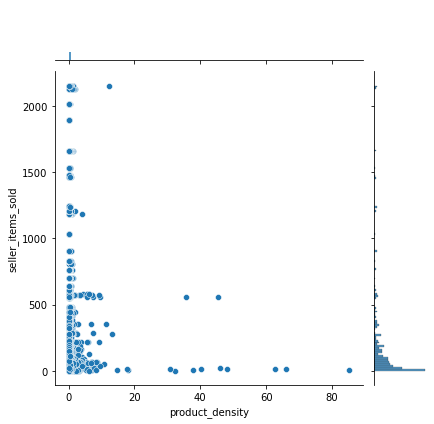

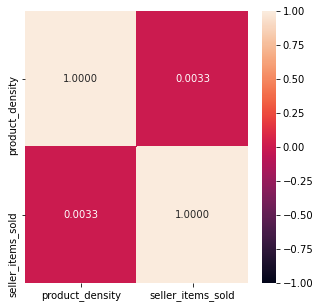

In [39]:
fig = plt.figure(figsize = (8,8))
sb.jointplot(data = sp, x="product_density", y="seller_items_sold")

fig = plt.figure(figsize = (5,5))
sb.heatmap(sp[["product_density", "seller_items_sold"]].corr(), vmin = -1, vmax = 1, annot = True, fmt=".4f")

<AxesSubplot:>

<Figure size 576x576 with 0 Axes>

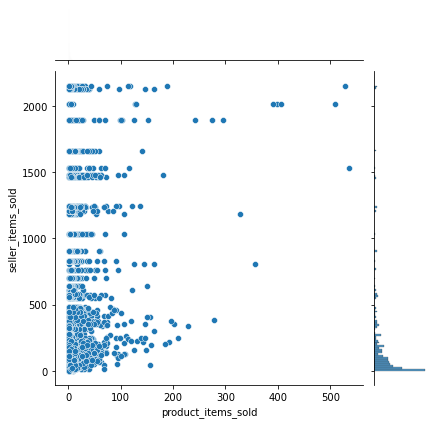

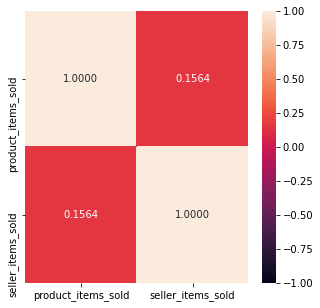

In [40]:
# against response 2: product_items_sold
fig = plt.figure(figsize = (8,8))
sb.jointplot(data = sp, x="product_items_sold", y="seller_items_sold")

fig = plt.figure(figsize = (5,5))
sb.heatmap(sp[["product_items_sold", "seller_items_sold"]].corr(), vmin = -1, vmax = 1, annot = True, fmt=".4f")

<AxesSubplot:>

<Figure size 576x576 with 0 Axes>

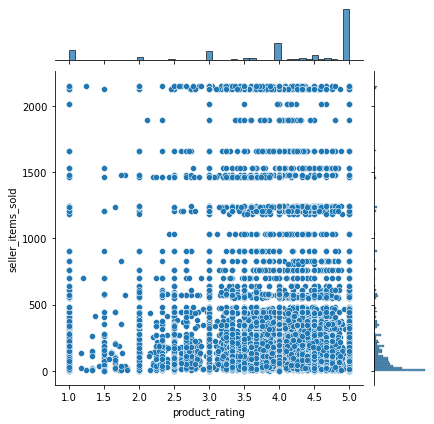

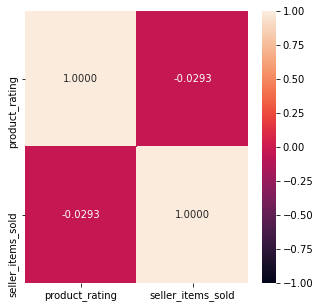

In [41]:
# against response 3: product_rating
fig = plt.figure(figsize = (8,8))
sb.jointplot(data = sp, x="product_rating", y="seller_items_sold")

fig = plt.figure(figsize = (5,5))
sb.heatmap(sp[["product_rating", "seller_items_sold"]].corr(), vmin = -1, vmax = 1, annot = True, fmt=".4f")

<AxesSubplot:>

<Figure size 576x576 with 0 Axes>

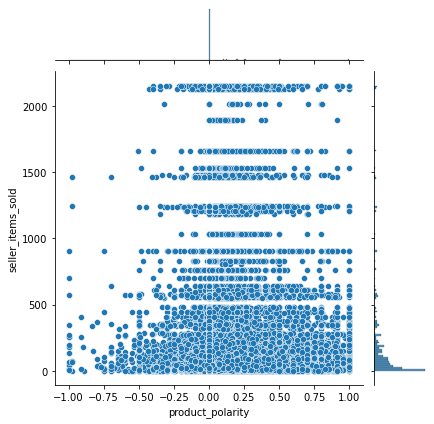

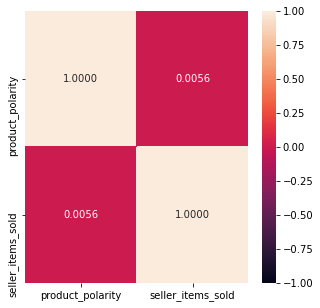

In [42]:
# against response 4: product_polarity
fig = plt.figure(figsize = (8,8))
sb.jointplot(data = sp, x="product_polarity", y="seller_items_sold")

fig = plt.figure(figsize = (5,5))
sb.heatmap(sp[["product_polarity", "seller_items_sold"]].corr(), vmin = -1, vmax = 1, annot = True, fmt=".4f")

<AxesSubplot:xlabel='seller_items_sold', ylabel='product_category_name'>

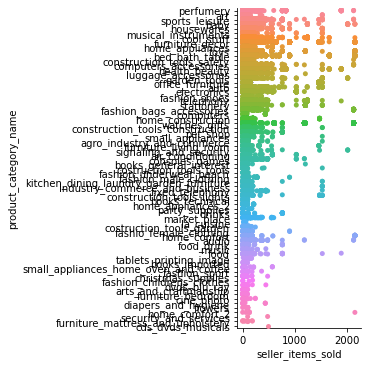

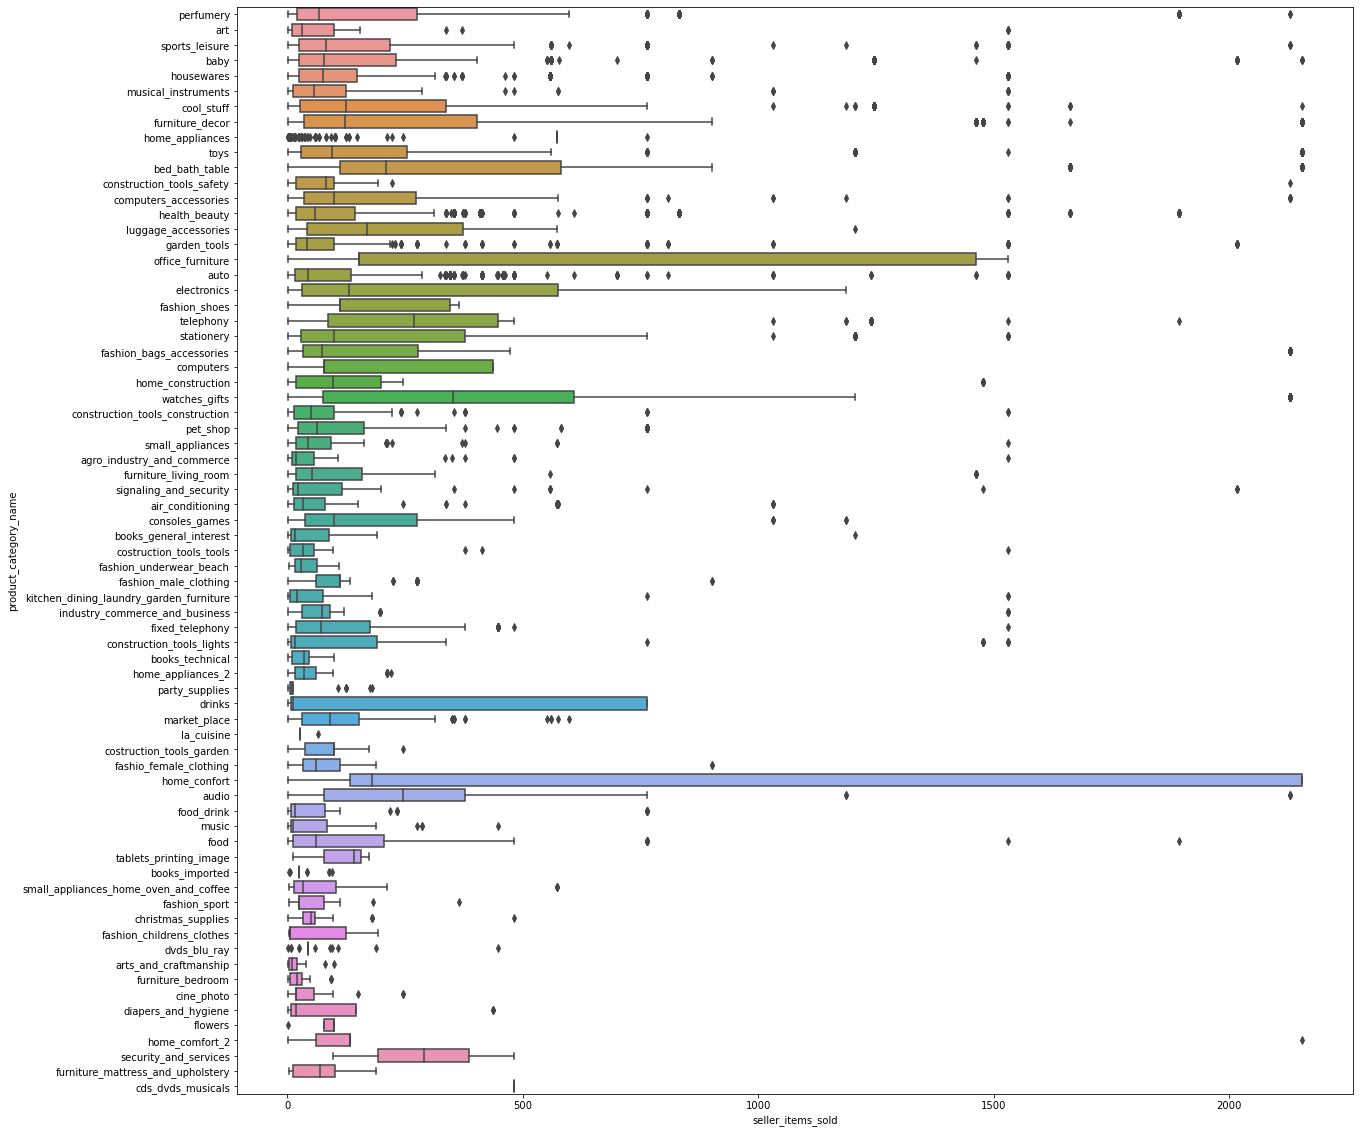

In [43]:
sb.catplot(data = sp, x="seller_items_sold", y="product_category_name")

fig = plt.figure(figsize = (20,20))
sb.boxplot(x = "seller_items_sold", y= "product_category_name", data = sp)

## 5. customerData
seller_items_sold against variables in customerData

In [44]:
# merging
sc = customerData.merge(so[["seller_id", "customer_id", "seller_items_sold"]], on="customer_id")
sc.drop_duplicates(subset=["seller_id", "customer_id"], inplace=True) # we do not want duplicates where the same customer buys from the same seller
sc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100010 entries, 0 to 118317
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   customer_id         100010 non-null  object
 1   customer_unique_id  100010 non-null  object
 2   customer_state      100010 non-null  object
 3   seller_id           100010 non-null  object
 4   seller_items_sold   100010 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 4.6+ MB


<AxesSubplot:xlabel='seller_items_sold', ylabel='customer_state'>

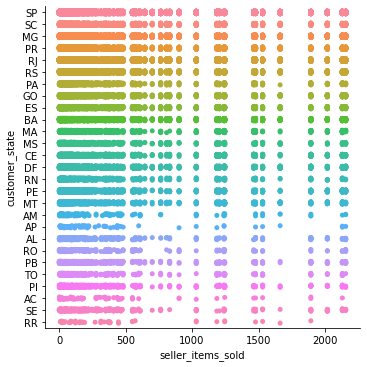

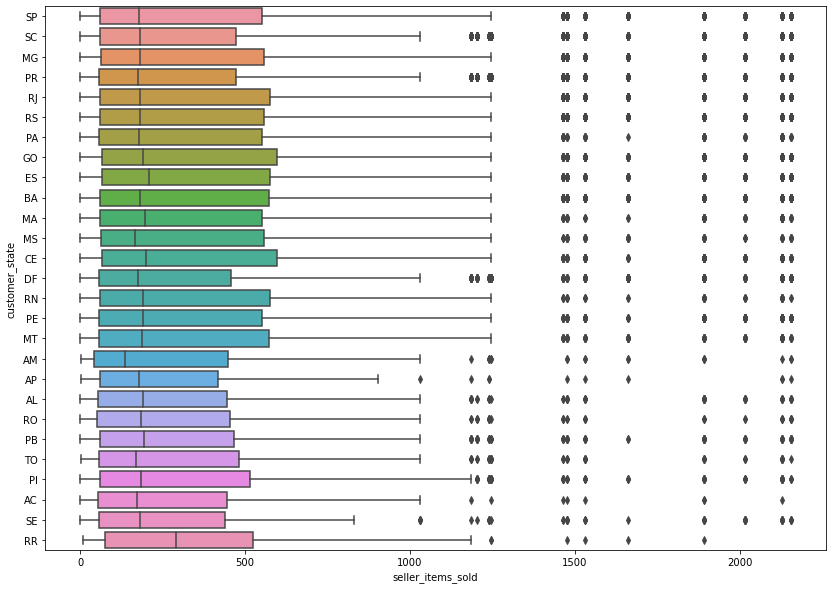

In [45]:
sb.catplot(data = sc, x="seller_items_sold", y="customer_state")

fig = plt.figure(figsize = (14,10))
sb.boxplot(x = "seller_items_sold", y= "customer_state", data = sc)